<a href="https://colab.research.google.com/github/DebugDuchess28/SiriAIML/blob/main/FoodHub_Data_Analysis_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import warnings

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")





Dataset loaded successfully!
Shape: (1898, 9)


In [8]:
# Write your code here to view the first 5 rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# Write your code here
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Shape: {df.shape}")

Number of rows: 1898
Number of columns: 9
Shape: (1898, 9)


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
# Write your code here
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
# Write your code here
# checking missing values
df.isnull().sum()

df['rating'] = df['rating'].replace(['Not given'], np.nan)
df['rating'] = df['rating'].astype(float)

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Write your code here
# Get statistical summary of the entire dataset
print("Statistical Summary of the Dataset:")
print(df.describe())

print("\n" + "="*50)

# Focus specifically on food_preparation_time
print("Food Preparation Time Statistics:")
print(f"Minimum preparation time: {df['food_preparation_time'].min()} minutes")
print(f"Average preparation time: {df['food_preparation_time'].mean():.2f} minutes")
print(f"Maximum preparation time: {df['food_preparation_time'].max()} minutes")



Statistical Summary of the Dataset:
           order_id    customer_id  cost_of_the_order       rating  \
count  1.898000e+03    1898.000000        1898.000000  1162.000000   
mean   1.477496e+06  171168.478398          16.498851     4.344234   
std    5.480497e+02  113698.139743           7.483812     0.741478   
min    1.476547e+06    1311.000000           4.470000     3.000000   
25%    1.477021e+06   77787.750000          12.080000     4.000000   
50%    1.477496e+06  128600.000000          14.140000     5.000000   
75%    1.477970e+06  270525.000000          22.297500     5.000000   
max    1.478444e+06  405334.000000          35.410000     5.000000   

       food_preparation_time  delivery_time  
count            1898.000000    1898.000000  
mean               27.371970      24.161749  
std                 4.632481       4.972637  
min                20.000000      15.000000  
25%                23.000000      20.000000  
50%                27.000000      25.000000  
75%        

### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# Write the code here
# Calculate percentage
total_orders = len(df)
unrated_orders = df['rating'].isnull().sum()
percentage_unrated = (unrated_orders / total_orders) * 100

print(f"Total orders: {total_orders}")
print(f"Unrated orders: {unrated_orders}")
print(f"Percentage unrated: {percentage_unrated:.1f}%")

Total orders: 1898
Unrated orders: 736
Percentage unrated: 38.8%


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Let us first explore the numerical variables.**

### 1. Observations on customer_id


---

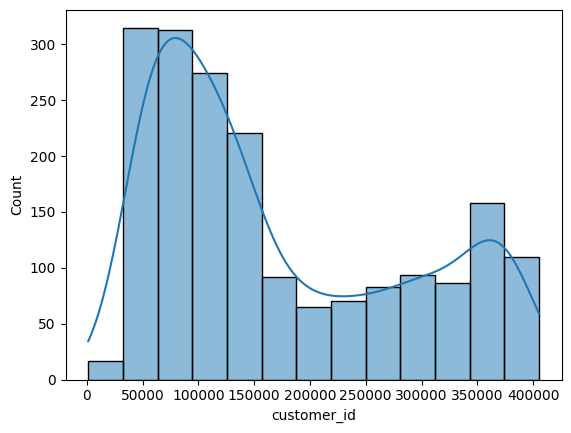

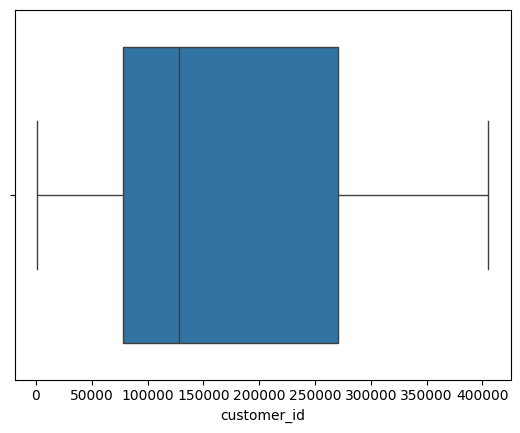

In [14]:
sns.histplot(data=df,x='customer_id', kde=True)
plt.show()
sns.boxplot(data=df,x='customer_id')
plt.show()

### Observations on cost_of_the_order


---

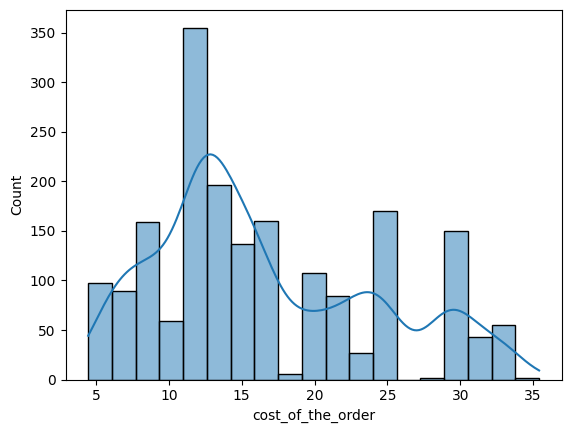

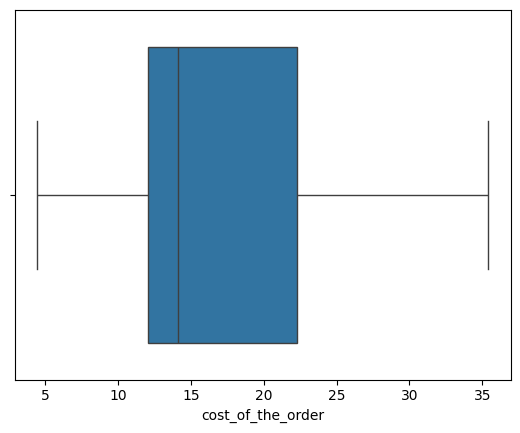

Average cost: $16.50
Median cost: $14.14
Minimum cost: $4.47
Maximum cost: $35.41


In [15]:
sns.histplot(data=df,x='cost_of_the_order', kde= True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

print(f"Average cost: ${df['cost_of_the_order'].mean():.2f}")
print(f"Median cost: ${df['cost_of_the_order'].median():.2f}")
print(f"Minimum cost: ${df['cost_of_the_order'].min():.2f}")
print(f"Maximum cost: ${df['cost_of_the_order'].max():.2f}")

### 3. Observations on rating


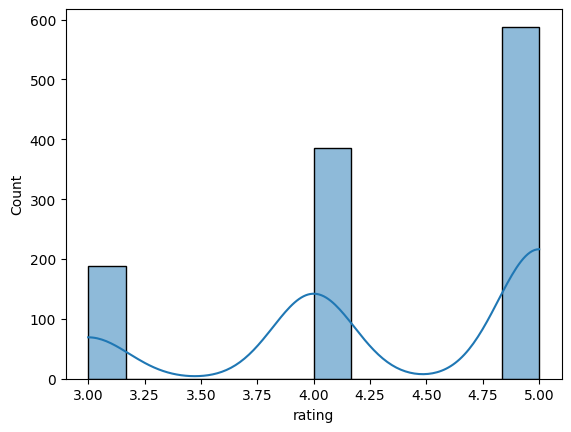

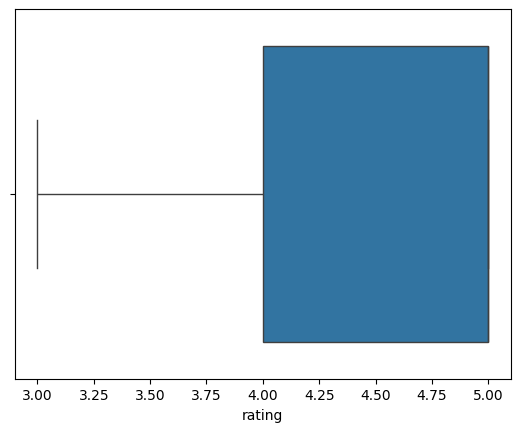

Rating breakdown:
  5.0: 588 orders (31.0%)
  4.0: 386 orders (20.3%)
  3.0: 188 orders (9.9%)


In [16]:
sns.histplot(data=df,x='rating', kde= True)
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()


rating_counts = df['rating'].value_counts()

print("Rating breakdown:")
for rating, count in rating_counts.items():
    percentage = count / len(df) * 100
    print(f"  {rating}: {count} orders ({percentage:.1f}%)")

### Observation on food_preparation_time

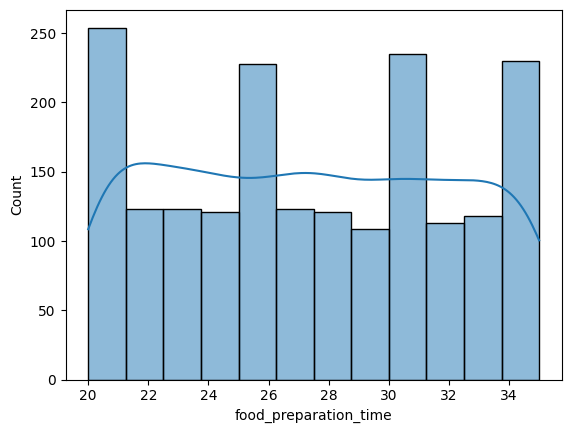

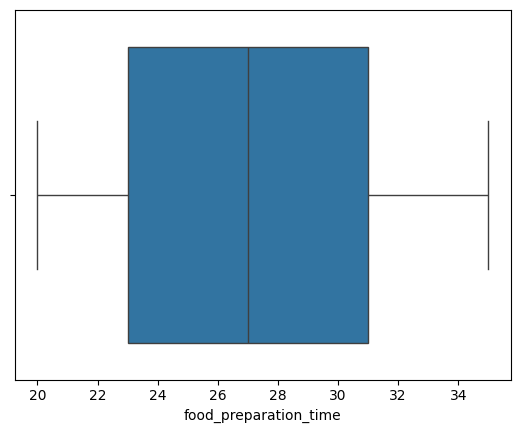

Average prep time: 27.4 minutes
Minimum prep time: 20 minutes
Maximum prep time: 35 minutes


In [17]:
sns.histplot(data=df,x='food_preparation_time', kde= True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

print(f"Average prep time: {df['food_preparation_time'].mean():.1f} minutes")
print(f"Minimum prep time: {df['food_preparation_time'].min()} minutes")
print(f"Maximum prep time: {df['food_preparation_time'].max()} minutes")

### Observation on delivery_time

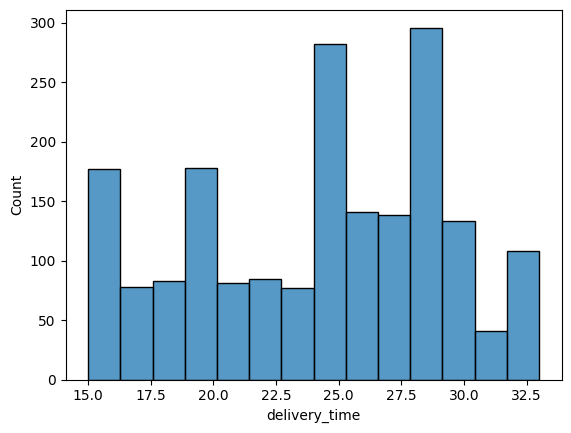

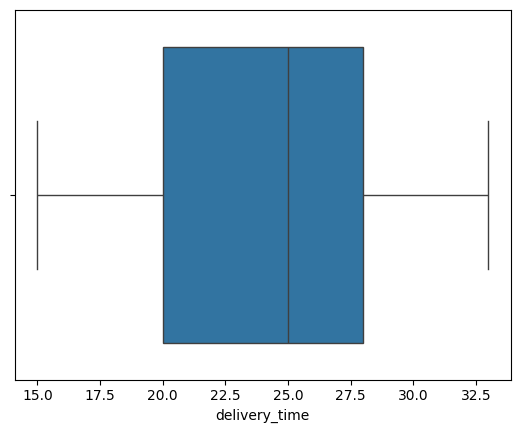

Average delivery time: 24.2 minutes
Minimum delivery time: 15 minutes
Maximum delivery time: 33 minutes


In [18]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

print(f"Average delivery time: {df['delivery_time'].mean():.1f} minutes")
print(f"Minimum delivery time: {df['delivery_time'].min()} minutes")
print(f"Maximum delivery time: {df['delivery_time'].max()} minutes")

### Let's now explore the Categorical columns.

Top 5 restaurants:
  1. Shake Shack: 219 orders
  2. The Meatball Shop: 132 orders
  3. Blue Ribbon Sushi: 119 orders
  4. Blue Ribbon Fried Chicken: 96 orders
  5. Parm: 68 orders


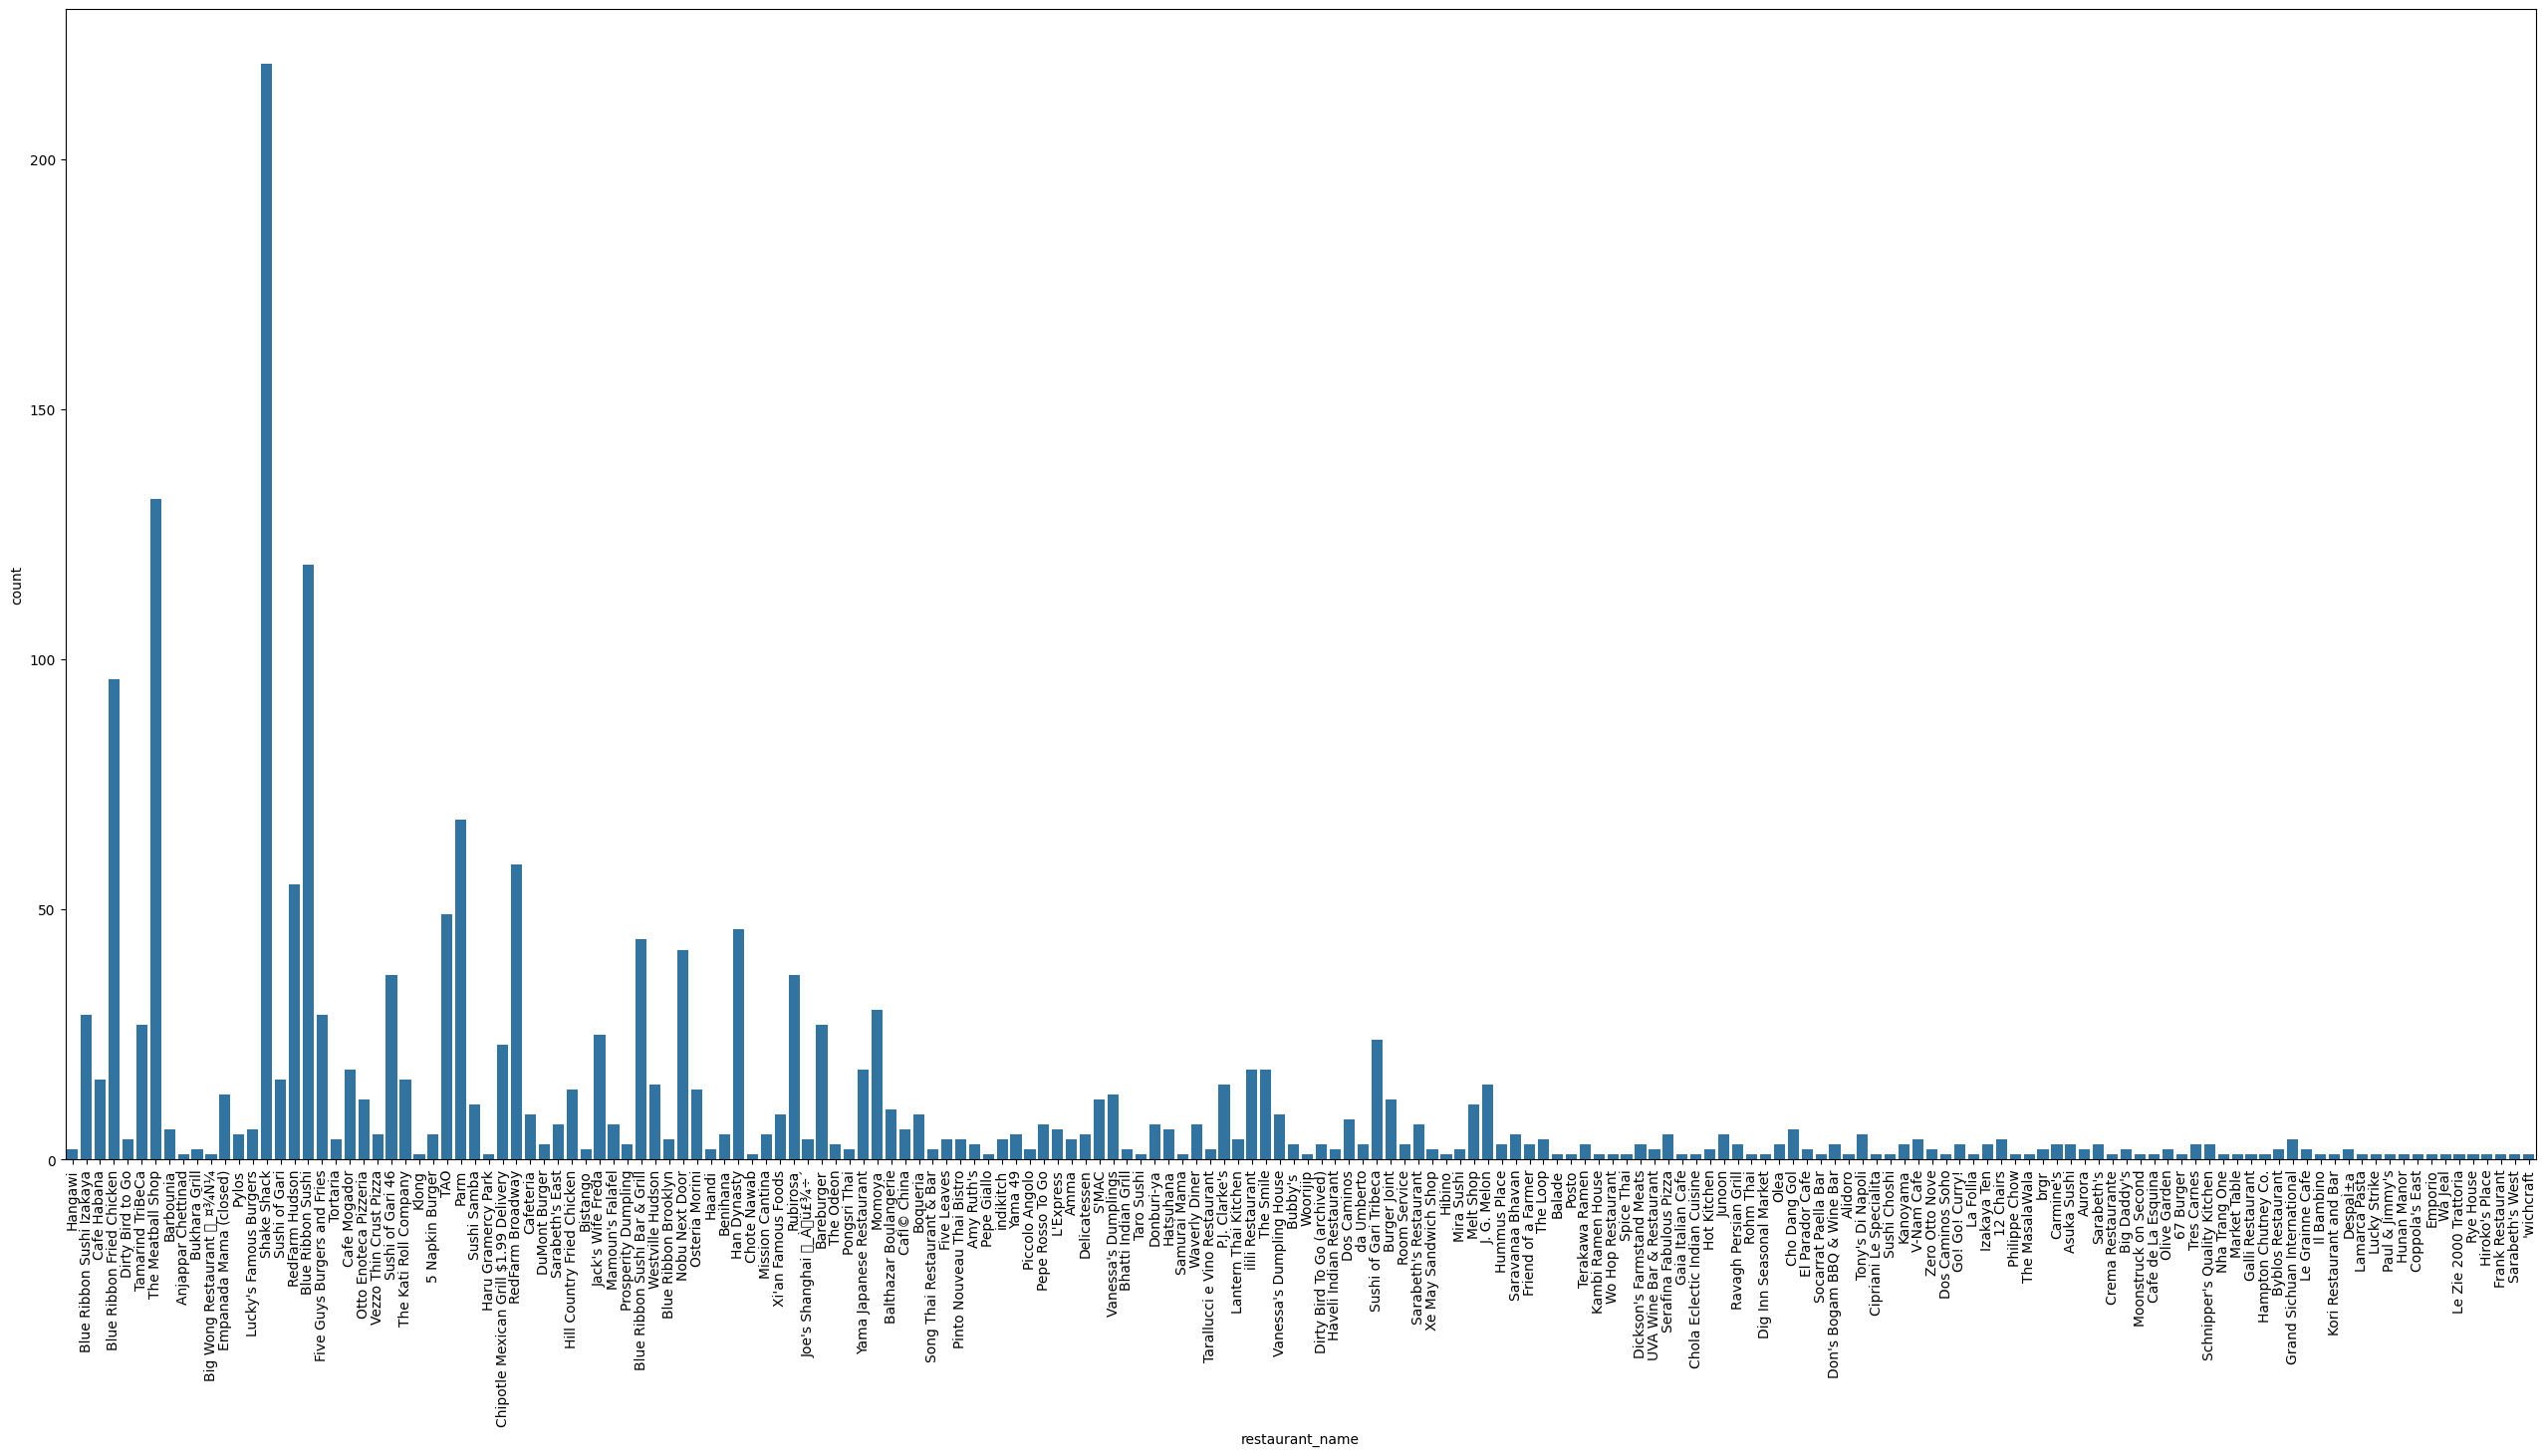

In [19]:
plt.figure(figsize=(32,15))
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90);
warnings.filterwarnings('ignore')

top_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants:")
for i, (restaurant, count) in enumerate(top_restaurants.items(), 1):
    print(f"  {i}. {restaurant}: {count} orders")

Most popular: American (584 orders)
Least popular: Vietnamese (7 orders)


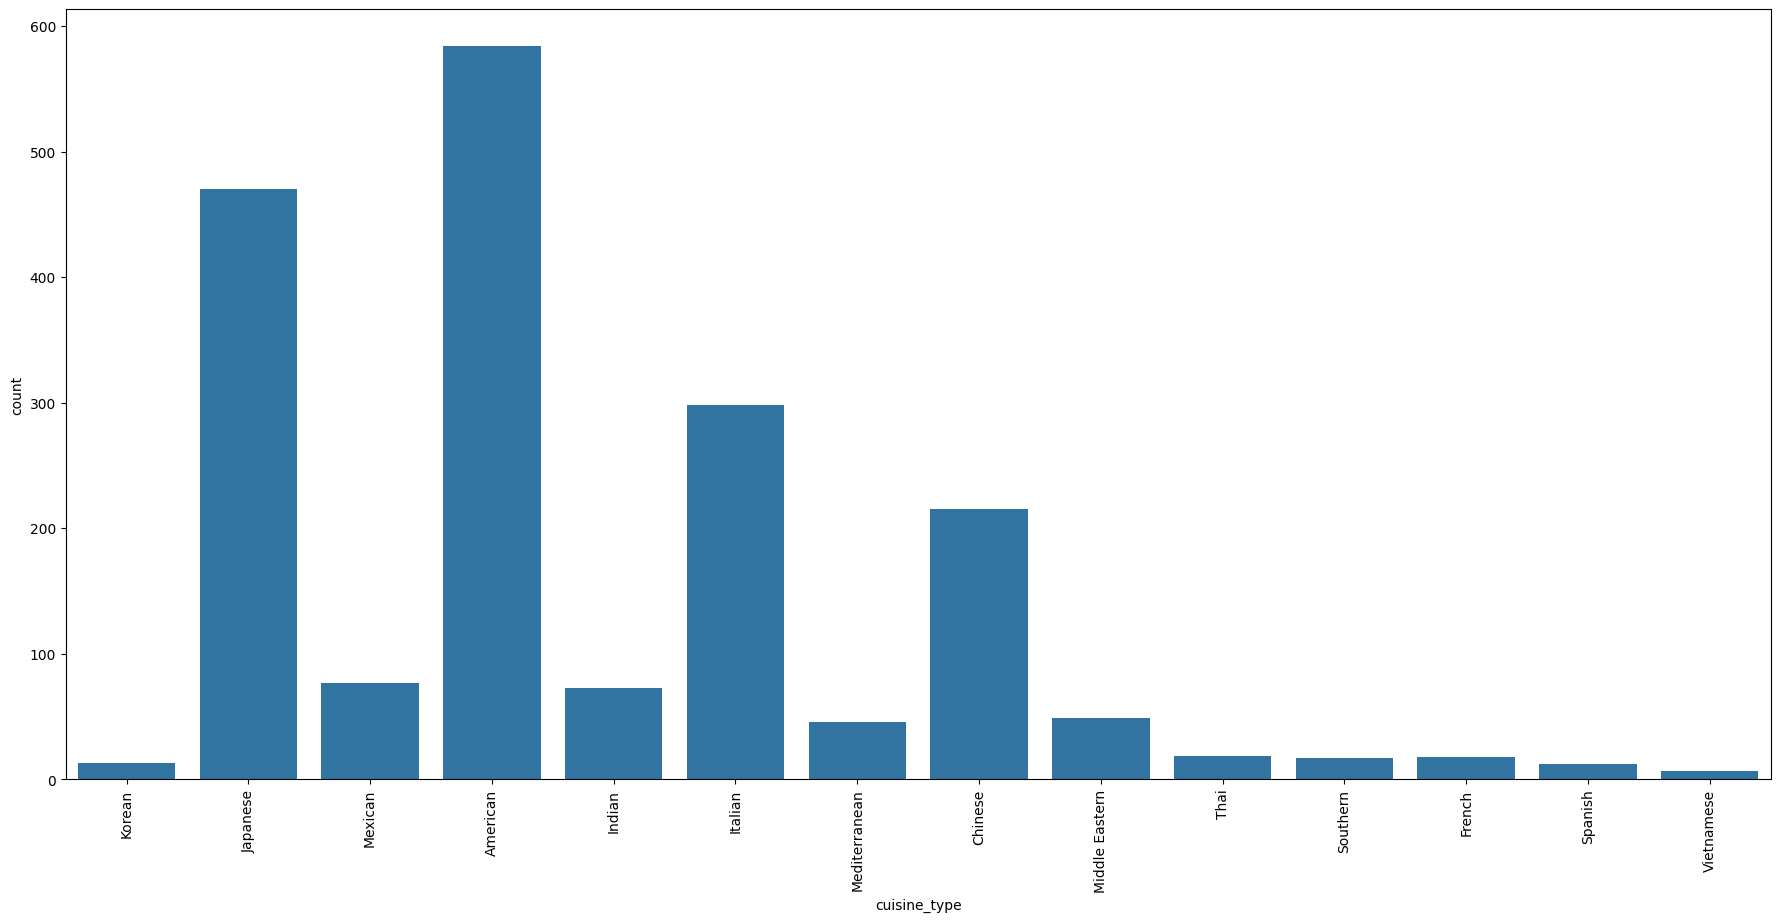

In [20]:
plt.figure(figsize=(22,10))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

cuisine_counts = df['cuisine_type'].value_counts()
print(f"Most popular: {cuisine_counts.index[0]} ({cuisine_counts.iloc[0]} orders)")
print(f"Least popular: {cuisine_counts.index[-1]} ({cuisine_counts.iloc[-1]} orders)")


Weekend orders: 1351 (71.2%)
Weekday orders: 547 (28.8%)


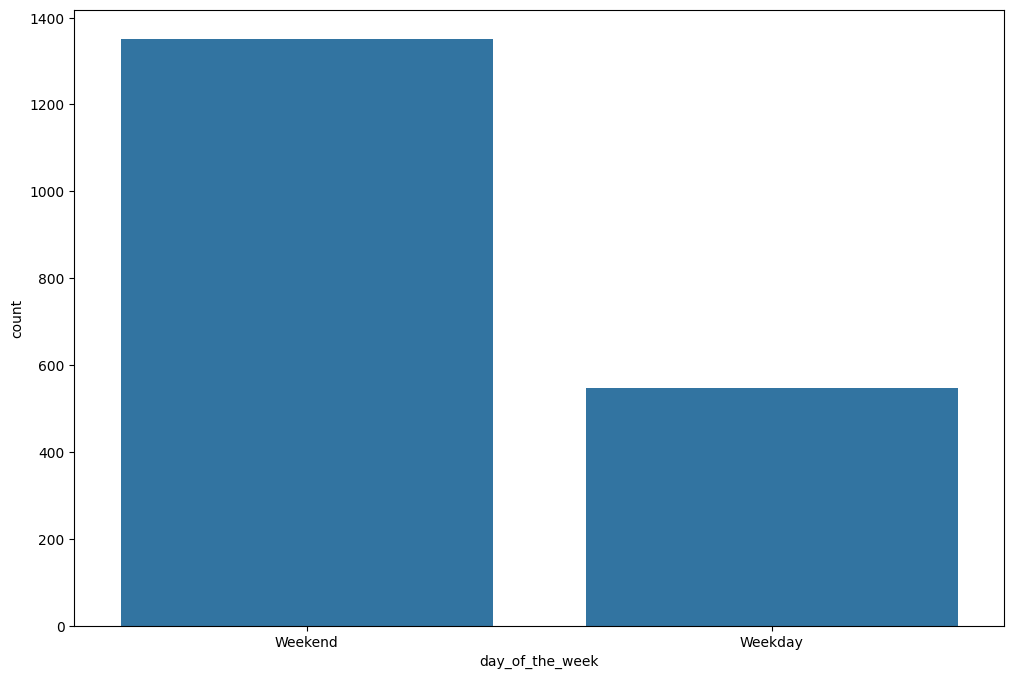

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='day_of_the_week');
day_counts = df['day_of_the_week'].value_counts()
weekend_orders = day_counts['Weekend']
weekday_orders = day_counts['Weekday']
print(f"Weekend orders: {weekend_orders} ({weekend_orders/len(df)*100:.1f}%)")
print(f"Weekday orders: {weekday_orders} ({weekday_orders/len(df)*100:.1f}%)")

In [22]:
## Summary
print("\nSUMMARY OF FINDINGS")
print("=" * 40)
print(f"1. Most popular cuisine: {cuisine_counts.index[0]}")
print(f"2. Average order cost: ${df['cost_of_the_order'].mean():.2f}")
print(f"3. Most orders on: {'Weekend' if day_counts['Weekend'] > day_counts['Weekday'] else 'Weekday'}")
print(f"4. Average preparation time: {df['food_preparation_time'].mean():.1f} minutes")
print(f"5. Average delivery time: {df['delivery_time'].mean():.1f} minutes")
#print(f"6. Most orders without rating: {'Yes' if rating_counts['Not given'] > rating_counts.drop('Not given').sum() else 'No'}")
print(f"7. Top restaurant: {top_restaurants.index[0]} with {top_restaurants.iloc[0]} orders")


SUMMARY OF FINDINGS
1. Most popular cuisine: American
2. Average order cost: $16.50
3. Most orders on: Weekend
4. Average preparation time: 27.4 minutes
5. Average delivery time: 24.2 minutes
7. Top restaurant: Shake Shack with 219 orders


# **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
# Write the code here
top_5 = df['restaurant_name'].value_counts().head(5)
print(top_5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [25]:
# Write the code here
print(df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1))


cuisine_type
American    415
Name: count, dtype: int64


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Write the code here
# Count orders over $20
orders_over_20 = (df['cost_of_the_order'] > 20).sum()
total_orders = len(df)
percentage = (orders_over_20 / total_orders) * 100
print(f"Percentage of the orders cost more than 20$: {percentage:.2f}%")


Percentage of the orders cost more than 20$: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Write the code here
delivery_time_mean = df['delivery_time'].mean()
print(f"Mean order delivery time: {delivery_time_mean:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Write the code here
# Get customer IDs and order counts
top_3_customers = df['customer_id'].value_counts().head(3)
print(top_3_customers)
customer_ids = top_3_customers.index.tolist()
order_counts = top_3_customers.values.tolist()


# Print voucher recipients
for customer_id, orders in top_3_customers.items():
    print(f"Customer {customer_id}: {orders} orders - 20% discount voucher")

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64
Customer 52832: 13 orders - 20% discount voucher
Customer 47440: 10 orders - 20% discount voucher
Customer 83287: 9 orders - 20% discount voucher


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### LOOKING AT INDIVIDUAL VARIABLES

In [29]:
# Write the code here
# Rating column is already numeric (float64), so we can use it directly
# Just handle any NaN values if they exist
df['rating_clean'] = df['rating']

print("\n" + "="*50)
print("PART 1: LOOKING AT INDIVIDUAL VARIABLES")
print("="*50)


PART 1: LOOKING AT INDIVIDUAL VARIABLES


### Cost distribution

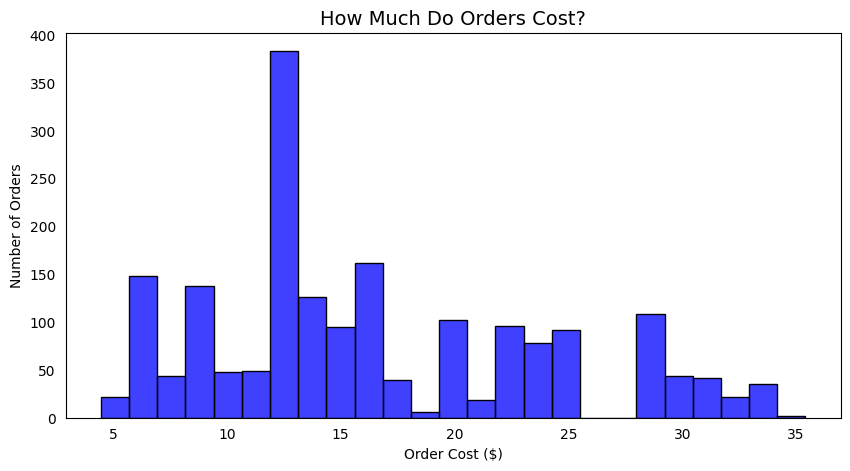

In [30]:
# Cost distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['cost_of_the_order'], bins=25, color='blue')
plt.title('How Much Do Orders Cost?', size=14)
plt.xlabel('Order Cost ($)')
plt.ylabel('Number of Orders')
plt.tick_params(left=False, bottom=False)
plt.show()

### Popular cuisines

Text(0.5, 0, 'Number of Orders')

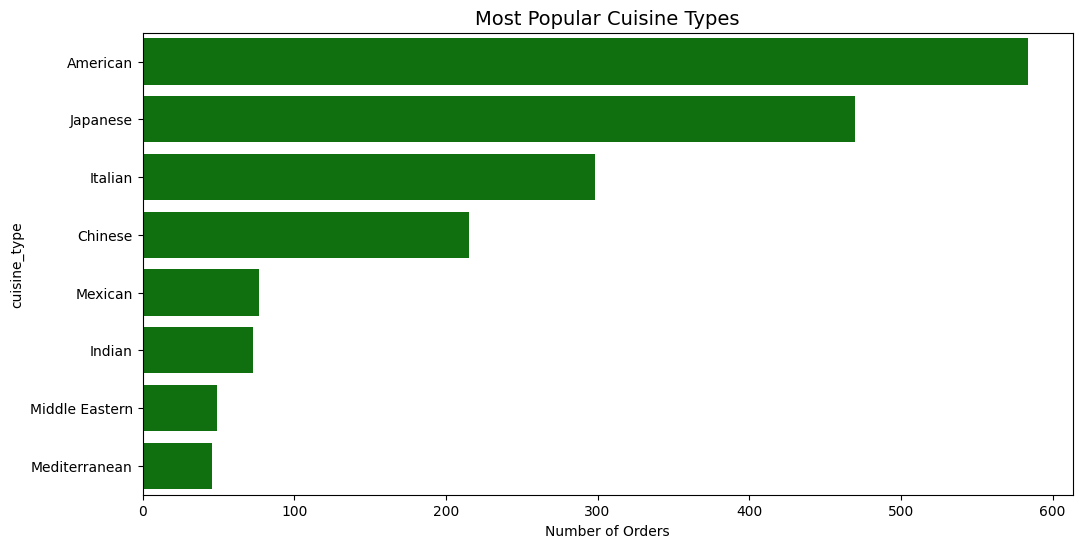

In [61]:
# Popular cuisines
plt.figure(figsize=(12, 6))
top_cuisines = df['cuisine_type'].value_counts().head(8)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, color='green')
plt.title('Most Popular Cuisine Types', size=14)
plt.xlabel('Number of Orders')



### Cost vs cuisine type

Text(0, 0.5, 'Order Cost ($)')

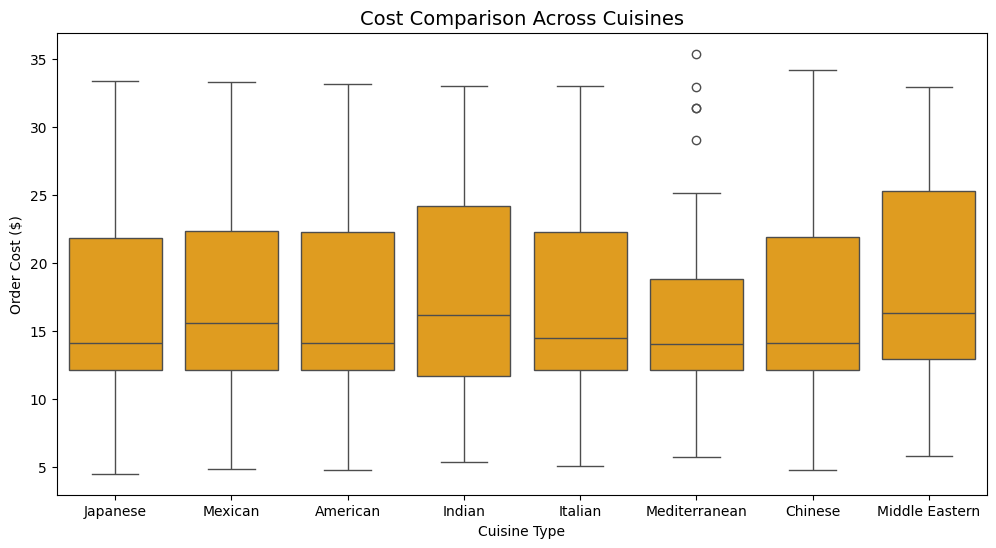

In [45]:
# Cost vs cuisine type
plt.figure(figsize=(12, 6))
top_8_cuisines = df['cuisine_type'].value_counts().head(8).index
df_top = df[df['cuisine_type'].isin(top_8_cuisines)]
sns.boxplot(data=df_top, x='cuisine_type', y='cost_of_the_order', color='orange')
plt.title('Cost Comparison Across Cuisines', size=14)
plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost ($)')

### Weekend vs weekday costs

Text(0, 0.5, 'Order Cost ($)')

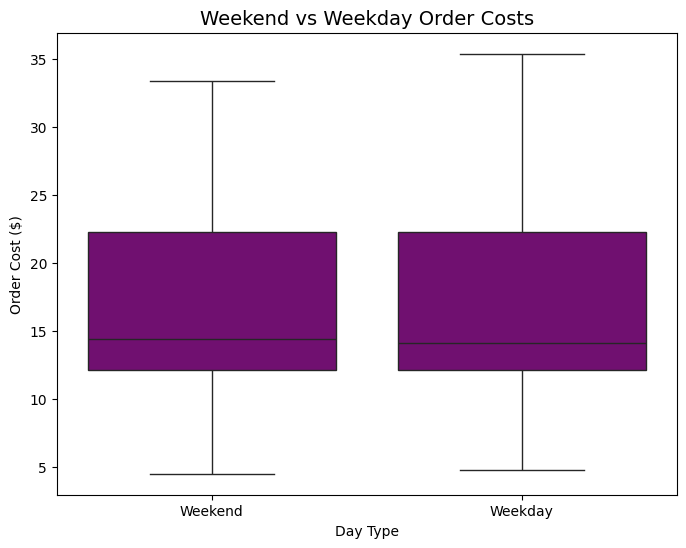

In [47]:
# Weekend vs weekday costs
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', color='purple')
plt.title('Weekend vs Weekday Order Costs', size=14)
plt.xlabel('Day Type')
plt.ylabel('Order Cost ($)')


### Total Delivery Time

Text(0.5, 0, 'Total Time (minutes)')

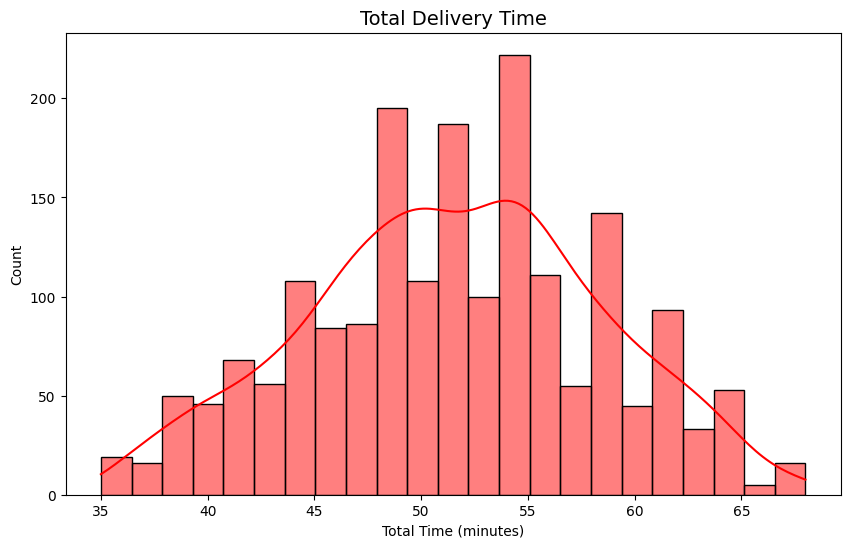

In [34]:
# 5. Prep time vs delivery time
# Total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
plt.figure(figsize=(10, 6))
sns.histplot(df['total_time'], color='red', kde=True)
plt.title('Total Delivery Time', size=14)
plt.xlabel('Total Time (minutes)')
#plt.figure(figsize=(8, 6))
#sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', alpha=0.6, color='red')
#plt.title('Preparation Time vs Delivery Time', size=14)
#plt.xlabel('Food Prep Time (minutes)')
#plt.ylabel('Delivery Time (minutes)')


### LOOKING AT MULTIPLE VARIABLES TOGETHER


PART 3: LOOKING AT MULTIPLE VARIABLES TOGETHER


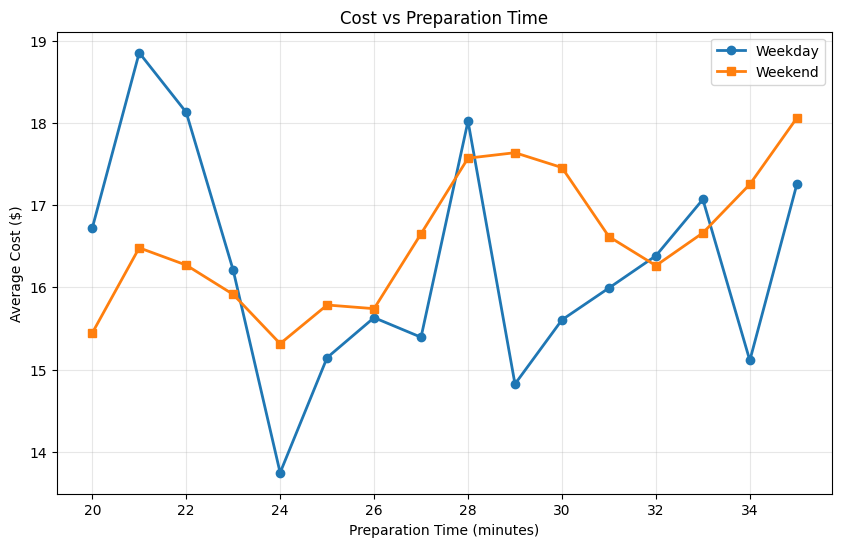

In [40]:

# 6. Cost vs prep time, colored by day type
# Group by prep time and day type, calculate average cost
avg_cost = df.groupby(['food_preparation_time', 'day_of_the_week'])['cost_of_the_order'].mean().unstack()

# Plot
plt.figure(figsize=(10, 6))
avg_cost['Weekday'].plot(marker='o', linewidth=2, label='Weekday')
avg_cost['Weekend'].plot(marker='s', linewidth=2, label='Weekend')

plt.title('Cost vs Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Average Cost ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Simple correlation heatmap

Text(0.5, 1.0, 'How Variables Relate to Each Other')

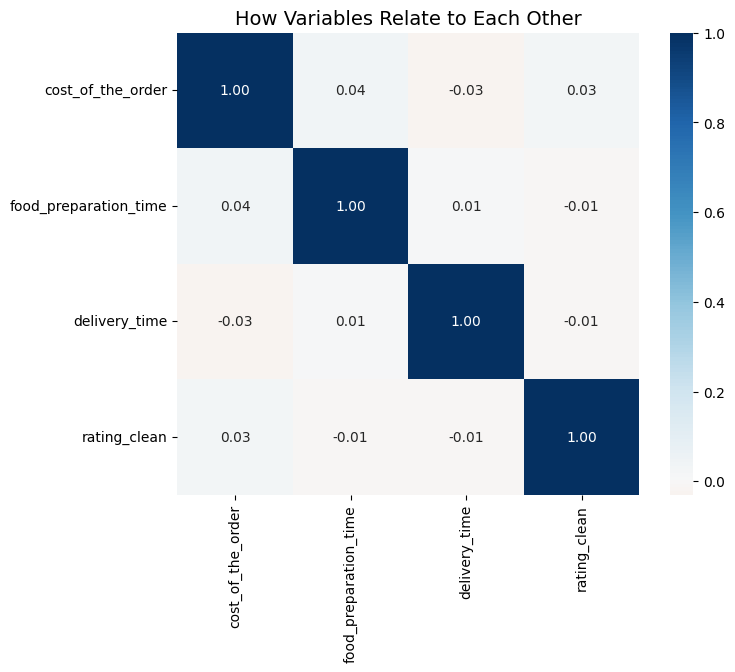

In [36]:
# Simple correlation heatmap
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation
numeric_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_clean']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0,
            square=True, fmt='.2f')
plt.title('How Variables Relate to Each Other', size=14)

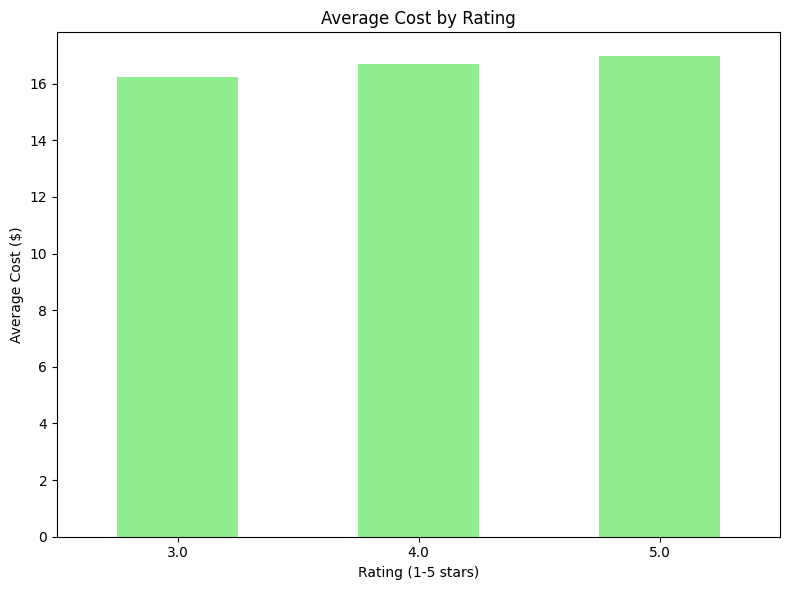

In [43]:
# Filter out "Not given" ratings and convert to numeric
df_valid = df[df['rating'] != 'Not given']
df_valid['rating'] = pd.to_numeric(df_valid['rating'])

# Calculate average cost for each rating
avg_cost_by_rating = df_valid.groupby('rating')['cost_of_the_order'].mean()

# Simple bar plot
plt.figure(figsize=(8, 6))
avg_cost_by_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Cost by Rating')
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Average Cost ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###

1.   Do higher-rated orders cost more?
2.   Are expensive orders getting better ratings




### Rating analysis (simple)

Text(0, 0.5, 'Number of Orders')

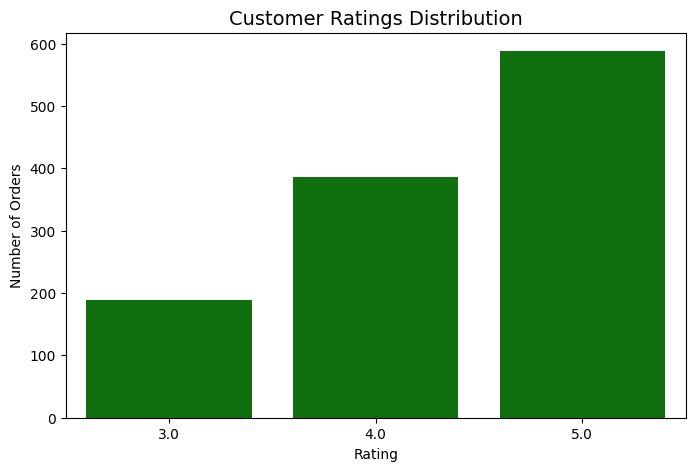

In [37]:
# Rating analysis (simple)
plt.figure(figsize=(8, 5))
# Filter out NaN ratings and create value counts
valid_ratings = df['rating'].dropna()
rating_counts = valid_ratings.value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='green')
plt.title('Customer Ratings Distribution', size=14)
plt.xlabel('Rating')
plt.ylabel('Number of Orders')




### Average preparation time by cuisine

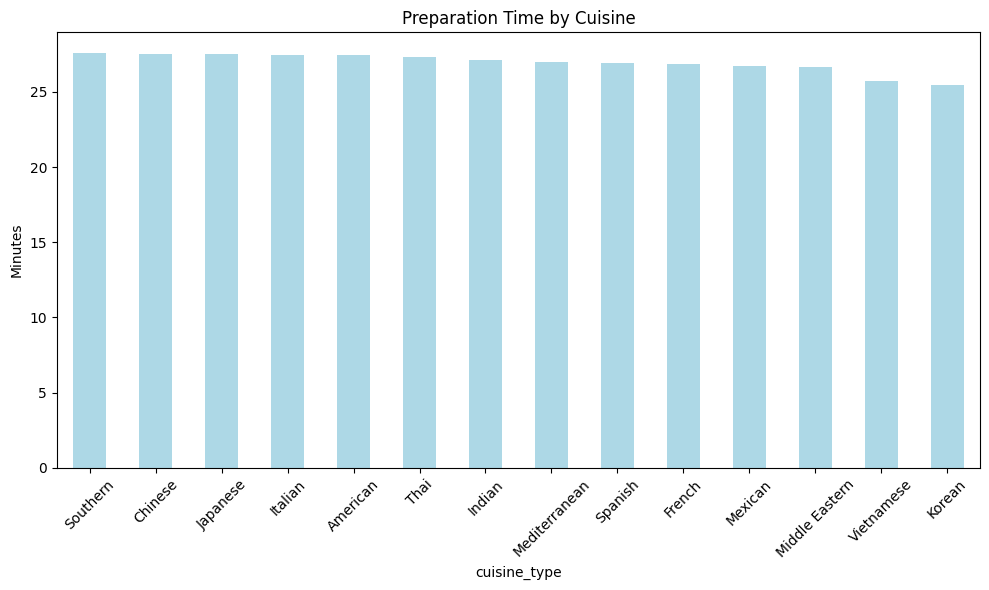

In [42]:

# Calculate average preparation time by cuisine
avg_prep_time = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False)

# Simple bar plot
plt.figure(figsize=(10, 6))
avg_prep_time.plot(kind='bar', color='lightblue')
plt.title('Preparation Time by Cuisine')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Simple correlation insights

In [58]:
# Simple correlation insights
cost_prep_corr = df['cost_of_the_order'].corr(df['food_preparation_time'])
print(f"• Cost and prep time correlation: {cost_prep_corr:.2f} (close to 0 = no strong relationship)")

# Check how many ratings we actually have
total_ratings = len(df['rating'].dropna())
print(f"• Number of orders with ratings: {total_ratings} out of {total_orders}")

• Cost and prep time correlation: 0.04 (close to 0 = no strong relationship)
• Number of orders with ratings: 1162 out of 1898


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [23]:
# Write the code here
df = df[df['rating'] != 'Not given']
df['rating'] = pd.to_numeric(df['rating'])

# Group by restaurant and get count and average
result = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants with >50 ratings and >4.0 average
qualified = result[(result['count'] > 50) & (result['mean'] > 4.0)]

print("Qualified Restaurants:")
print(qualified)

Qualified Restaurants:
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

def commission(cost):
    if cost > 20: return cost * 0.25
    elif cost > 5: return cost * 0.15
    else: return 0

revenue = df['cost_of_the_order'].apply(commission).sum()
print(revenue)

6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [26]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
over_60 = (df['total_time'] > 60).sum()
total_orders = len(df)
percentage = (over_60 / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [60]:
# Write the code here
df['delivery_time_weekday'] = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
df['delivery_time_weekend'] = df[df['day_of_the_week'] == 'Weekend']['delivery_time']
print(f"Weekday delivery time mean: {df['delivery_time_weekday'].mean():.2f} minutes")
print(f"Weekend delivery time mean: {df['delivery_time_weekend'].mean():.2f} minutes")

mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

mean_difference= mean_delivery_time_weekday - mean_delivery_time_weekend
print(f"Mean difference between weekdays and weekends: {mean_difference:.2f} minutes")

Weekday delivery time mean: 28.34 minutes
Weekend delivery time mean: 22.47 minutes
Mean difference between weekdays and weekends: 5.87 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


In [59]:

print(f"\nWhat this means:")
print("1. Most people order American and Japanese food")
print("2. Weekend orders are much more common than weekday")
print("3. Order cost doesn't strongly depend on prep time")
print("4. There's variety in both costs and service times")


What this means:
1. Most people order American and Japanese food
2. Weekend orders are much more common than weekday
3. Order cost doesn't strongly depend on prep time
4. There's variety in both costs and service times


### Recommendations:

*  

---